In [2]:
from libs.MSCTDdataset import MSCTD

from torch.utils.data import Dataset, DataLoader
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# url='https://drive.google.com/file/d/1J1UlbVITagJrUwWb24uKa8DSIihwS3F7/view?usp=share_link'
# path='./Datasets/test/train.pdf'
# MSCTD(mode='train',root_dir="/home/user01/deepProject/Datasets",read_mode="scene",download=True,url=url,output_path=path)

In [4]:
training_data = MSCTD(mode='train',root_dir="/home/user01/deepProject/Datasets",read_mode="scene")
valid_data = MSCTD(mode='dev',root_dir="/home/user01/deepProject/Datasets",read_mode="scene")
test_data = MSCTD(mode='test',root_dir="/home/user01/deepProject/Datasets",read_mode="scene")

## A:

In [5]:
def sentimentDist(data, color):
    sentiment = []
    sentiment.extend(data.sentiment)
    sb.histplot(sentiment, color=color)

(0.0, 9000.0)

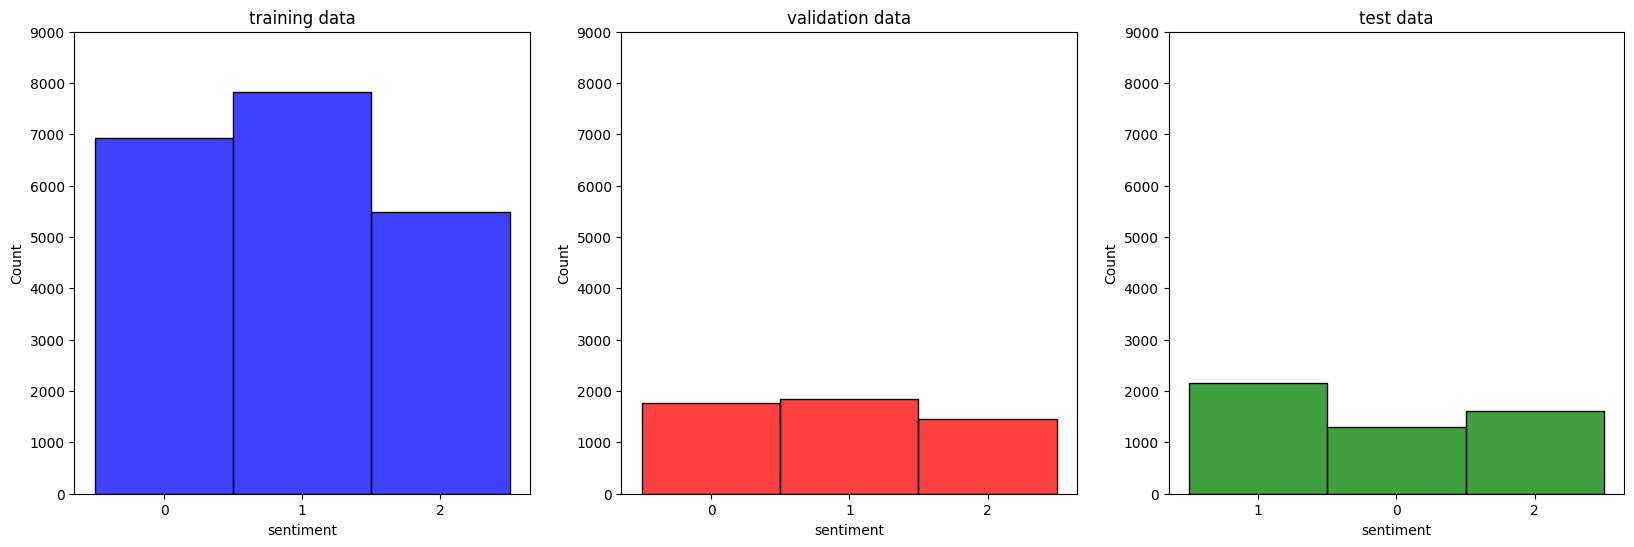

In [6]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
sentimentDist(training_data, color='blue')
plt.title("training data")
plt.xlabel('sentiment')
plt.ylim((0,9000))

plt.subplot(1,3,2)
sentimentDist(valid_data, 'red')
plt.title("validation data")
plt.xlabel('sentiment')
plt.ylim((0,9000))

plt.subplot(1,3,3)
sentimentDist(test_data, 'green')
plt.title("test data")
plt.xlabel('sentiment')
plt.ylim((0,9000))

## B:

In [7]:
def wordsLength(data):
    length = np.array([len(sentence.split(" ")) for sentence in data.english_text])
    print("mean : ", length.mean())
    print("variance : ", length.var())
    sb.histplot(length, kde=True)
    plt.xlabel('Words Length')

* training data

mean :  6.4644268774703555
variance :  9.247252339514754


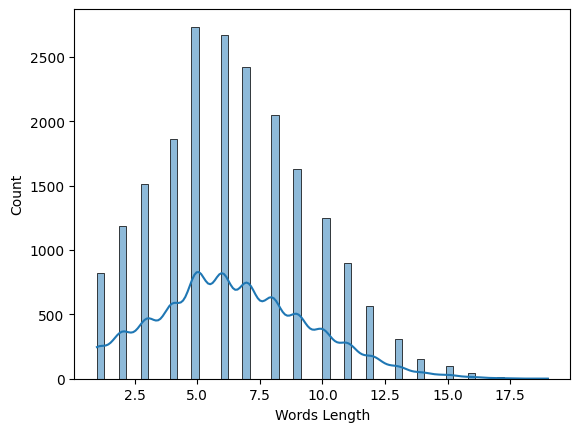

In [8]:
wordsLength(training_data)

* validation data

mean :  6.310290341694648
variance :  8.630759208611043


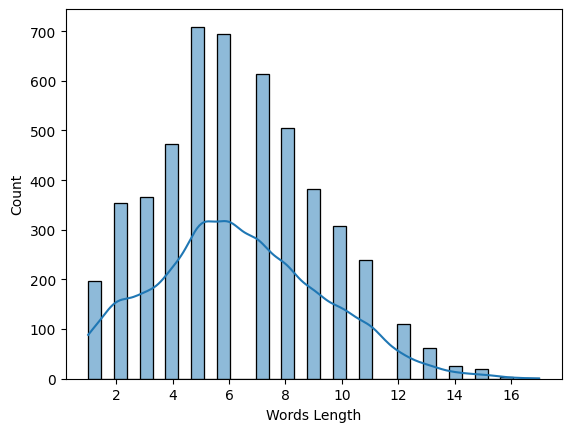

In [9]:
wordsLength(valid_data)

* test data

mean :  6.303927373199132
variance :  8.892826494034605


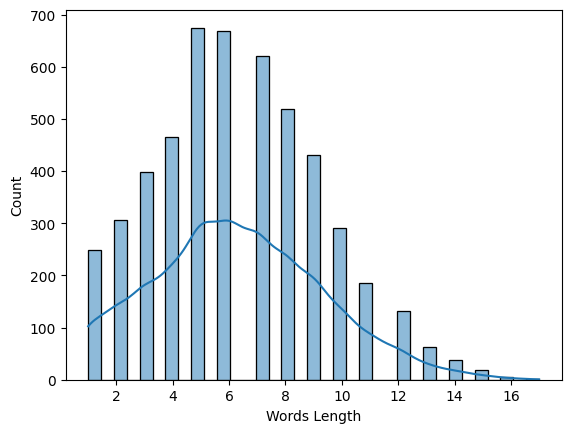

In [10]:
wordsLength(test_data)

## C:

In [11]:
def imageConversation(data):
    numberFrame = np.array([len(index) for index in data.image_index])
    print("mean : ", numberFrame.mean())
    print("variance : ", numberFrame.var())
    sb.histplot(numberFrame, kde=True)
    plt.xlabel('number of image in conversation')

* training data

mean :  9.796708615682478
variance :  17.69632992187156


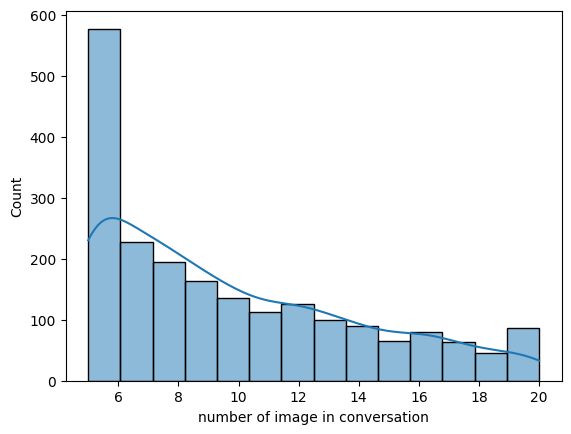

In [12]:
imageConversation(training_data)

* validation data 

mean :  10.045634920634921
variance :  19.253869834971024


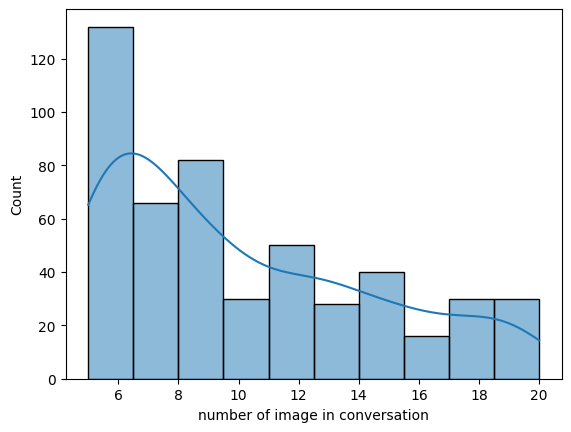

In [13]:
imageConversation(valid_data)

* test data

mean :  9.954813359528487
variance :  17.752378599742936


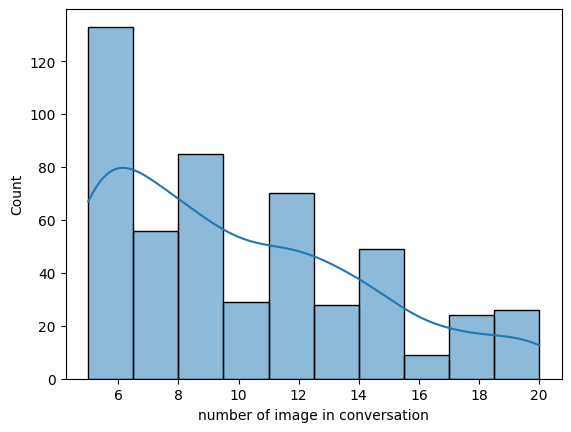

In [14]:
imageConversation(test_data)

## E:

In [199]:
nSentiment = np.array([[int(j),len(i.split())] for i,j in zip(training_data.english_text, training_data.sentiment)])

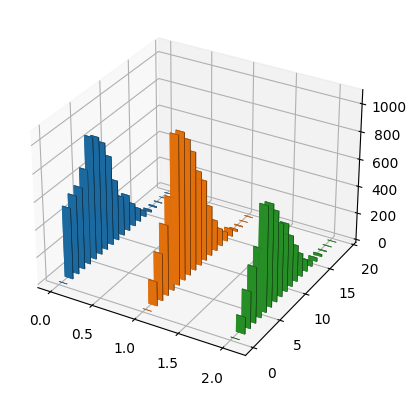

In [212]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xedges = range(2+2)
yedges = range(nSentiment[:,1].max()+2)
hist, xedges, yedges = np.histogram2d(nSentiment[:,0], nSentiment[:,1],bins=(xedges,yedges))

# Construct arrays for the anchor positions
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions
dx = dy = 0.1 * np.ones_like(zpos)
dz = hist.ravel()
idx = yedges[:-1].shape[0]
for i in range(3):
    ax.bar3d(xpos[idx*i:idx*(i+1)], ypos[idx*i:idx*(i+1)], zpos, dx, dy, dz[idx*i:idx*(i+1)], zsort='average')
plt.show()

## F:

In [20]:
def timeSentimentPattern(data):
    x = []
    for i in data.image_index:
        y = []
        for j in data.sentiment[i[0]:i[-1]+1]:
            if len(y) > 0 and j != y[-1]:
                y.extend(j)
            elif len(y) == 0:
                y.extend(j)
        x.append(''.join(y))
    return sorted(x,key=len)

* training data

In [78]:
np.unique(timeSentimentPattern(training_data)[0:300],axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

<bound method Artist.get_label of <AxesSubplot: ylabel='Count'>>

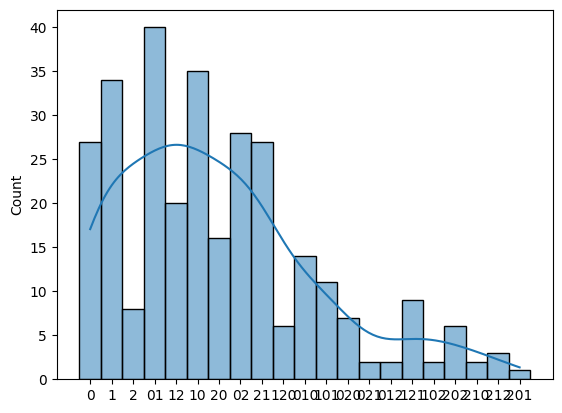

In [74]:
ax = sb.histplot(timeSentimentPattern(training_data)[0:300], kde=True);
ax.get_label
# ax.set_xticklabels(set(timeSentimentPattern(training_data)[0:300]),rotation=90)
# plt.xlabel("Sentiment patterns over time")

* validation data 

Text(0.5, 0, 'time sentiment pattern')

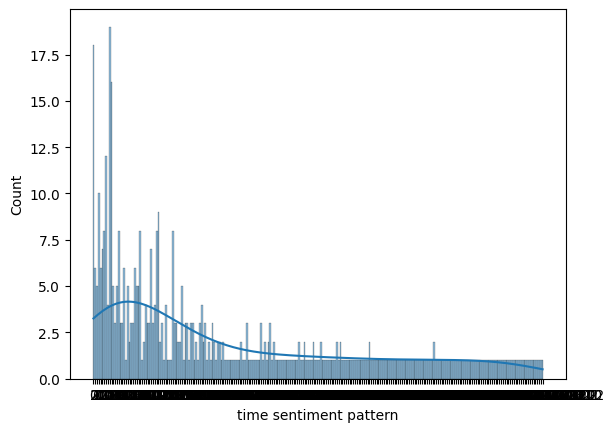

In [23]:
sb.histplot(timeSentimentPattern(valid_data), kde=True);
plt.xlabel("Sentiment patterns over time")

* test data

Text(0.5, 0, 'time sentiment pattern')

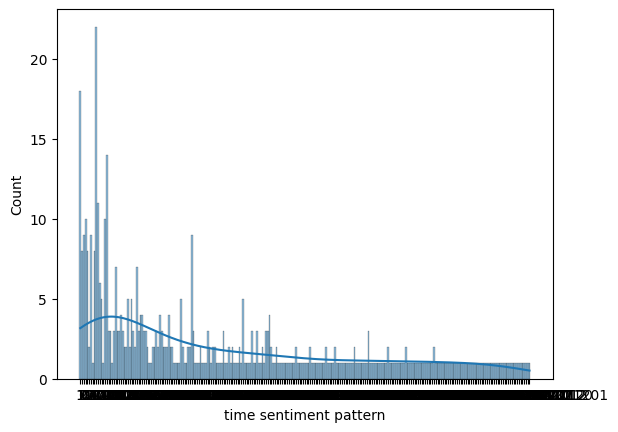

In [24]:
sb.histplot(timeSentimentPattern(test_data), kde=True);
plt.xlabel("Sentiment patterns over time")

## G:

In [40]:
#TODO
def comparison(data):
    from math import floor
    lengthConv = [len(index) for index in data.image_index]
    print("number of class in pattern histogram :", len(set(timeSentimentPattern(data))))
    print("number of possible pattern :", 3*(2**(floor(np.mean(lengthConv))+1)-1))

* training data

In [41]:
comparison(training_data)

number of class in pattern histogram : 681
number of possible pattern : 3069


* validation data

In [42]:
comparison(valid_data)

number of class in pattern histogram : 250
number of possible pattern : 6141


* test data

In [37]:
comparison(test_data)

number of class in pattern histogram : 255
number of possible pattern : 3069
